## Evaluating Methodology 2 (Artificial Neural Networks) (LSTM)

### Packages

In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

### Functions

### Get dataset

In [48]:
df_diff = pd.read_csv('../../assets/df_diff.csv', index_col=0)

# example of read_csv on google drive
# df_diff = pd.read_csv('/content/drive/MyDrive/Empresas/ZRP/Desafio Técnico/zrp_case-main/assets/df_diff.csv')
# model = keras.models.load_model('/content/drive/MyDrive/Empresas/ZRP/Desafio Técnico/zrp_case-main/assets/model')

### Preparing dataset (split, scaling and numpy array conversion)

In [49]:
# Separete features and labels
df_m2 = df_diff.copy()
df_m2.drop(columns=['mean'], inplace=True)
m2_array = df_m2.values
X = m2_array[:, :-1]
y = m2_array[:, -1]

In [50]:
# normalize features
ss = MinMaxScaler(feature_range=(0, 1))
X = ss.fit_transform(X)

In [51]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=52)  # 80% train

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=52)  # 10% val, 10% testc

In [52]:
# convert X_train to LSTM model input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

In [53]:
X_train.shape

(2812, 1, 14)

### LSTM Declaration

In [54]:
# create the model
model = Sequential()
model.add(Input(shape= X_train.shape[1:], name='input'))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               277504    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 310,529
Trainable params: 310,529
Non-trainable params: 0
_________________________________________________________________
None


### LSTM Training

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
88/88 [==============================] - 4s 16ms/step - loss: 0.6809 - accuracy: 0.5743 - val_loss: 0.6816 - val_accuracy: 0.5869
Epoch 2/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6693 - accuracy: 0.5885 - val_loss: 0.6644 - val_accuracy: 0.5584
Epoch 3/50
88/88 [==============================] - 1s 10ms/step - loss: 0.6583 - accuracy: 0.5814 - val_loss: 0.6596 - val_accuracy: 0.5726
Epoch 4/50
88/88 [==============================] - 1s 8ms/step - loss: 0.6564 - accuracy: 0.5900 - val_loss: 0.6618 - val_accuracy: 0.5698
Epoch 5/50
88/88 [==============================] - 1s 8ms/step - loss: 0.6556 - accuracy: 0.5878 - val_loss: 0.6567 - val_accuracy: 0.5983
Epoch 6/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6524 - accuracy: 0.5982 - val_loss: 0.6534 - val_accuracy: 0.5812
Epoch 7/50
88/88 [==============================] - 1s 8ms/step - loss: 0.6482 - accuracy: 0.6003 - val_loss: 0.6510 - val_accuracy: 0.5926
Epoch 8/50
88/88 [

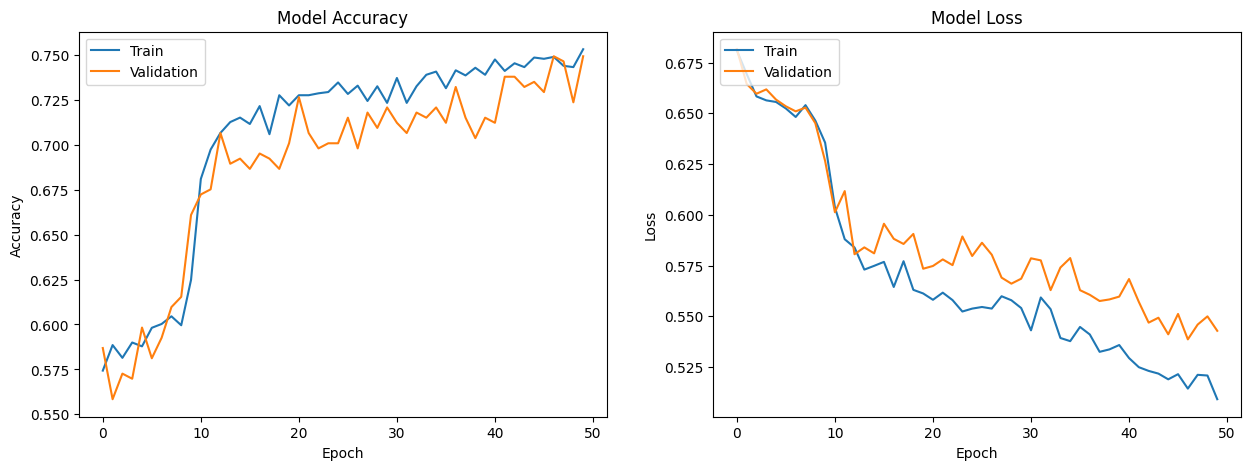

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### LSTM Evaluation

In [57]:
# Final evaluation of the model
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 75.85%


In [58]:
X_test.shape

(352, 1, 14)

In [60]:
model.save('../../assets/model')

INFO:tensorflow:Assets written to: ../../assets/model\assets


INFO:tensorflow:Assets written to: ../../assets/model\assets
